### 30. juni
Arbeidstimer: 8t

Lagde et nytt script for gradvis læring etter å ha funnet ut at jeg kan bruke target_transform i Pytorch som gjorde ting lettere og fikk plot som forventet!! Koden for dette er vist under.

hadde møte med Anders hvor jeg fikk en ny oppgave å jobbe med. Skal prøve å plotte vektendring mot antall vekter.

Startet på et script for å se på den nye oppgaven. Dette vises i neste notebook.

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Define the training parameters
batch_size = 64
num_epochs = 30

# Initialize lists to track weight differences, accuracies, and losses
weight_diffs = []
accuracies = []
losses = []

# Train the neural network with the specified training scheme
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    if epoch < 10:
        train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True, target_transform=lambda y: (y % 4))
    elif epoch < 20:
        train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True, target_transform=lambda y: (y % 5))
    else:
        train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True) # target_transform=lambda y: (y % 6)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    total_loss = 0.0
    correct = 0
    # Gjør om til tomme lister isteden!
    weight_diff = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

        if epoch > 0:
            weight_diff += torch.norm(model.fc[0].weight.data - prev_weights)

        prev_weights = model.fc[0].weight.data.clone()

    accuracy = 100.0 * correct / len(train_loader.dataset)
    losses.append(total_loss / len(train_loader))
    accuracies.append(accuracy)
    weight_diffs.append(weight_diff.item() if isinstance(weight_diff, torch.Tensor) else weight_diff)

    print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.2f}%, Loss: {total_loss/len(train_loader):.4f}, Weight Difference: {weight_diff:.4f}')

# Plot the weight difference, accuracy, and loss over epochs
epochs = list(range(1, num_epochs+1))

Epoch [1/30], Accuracy: 78.38%, Loss: 0.6025, Weight Difference: 0.0000
Epoch [2/30], Accuracy: 86.52%, Loss: 0.3937, Weight Difference: 16.6891
Epoch [3/30], Accuracy: 90.04%, Loss: 0.3055, Weight Difference: 15.7785
Epoch [4/30], Accuracy: 92.02%, Loss: 0.2500, Weight Difference: 15.3539
Epoch [5/30], Accuracy: 93.24%, Loss: 0.2145, Weight Difference: 15.0823
Epoch [6/30], Accuracy: 93.99%, Loss: 0.1898, Weight Difference: 14.7529
Epoch [7/30], Accuracy: 94.59%, Loss: 0.1717, Weight Difference: 14.6540
Epoch [8/30], Accuracy: 95.03%, Loss: 0.1573, Weight Difference: 14.5326
Epoch [9/30], Accuracy: 95.48%, Loss: 0.1452, Weight Difference: 14.0944
Epoch [10/30], Accuracy: 95.74%, Loss: 0.1359, Weight Difference: 14.1803
Epoch [11/30], Accuracy: 88.97%, Loss: 0.3778, Weight Difference: 19.1263
Epoch [12/30], Accuracy: 93.58%, Loss: 0.2142, Weight Difference: 15.0226
Epoch [13/30], Accuracy: 94.68%, Loss: 0.1806, Weight Difference: 13.8648
Epoch [14/30], Accuracy: 95.24%, Loss: 0.1609, W

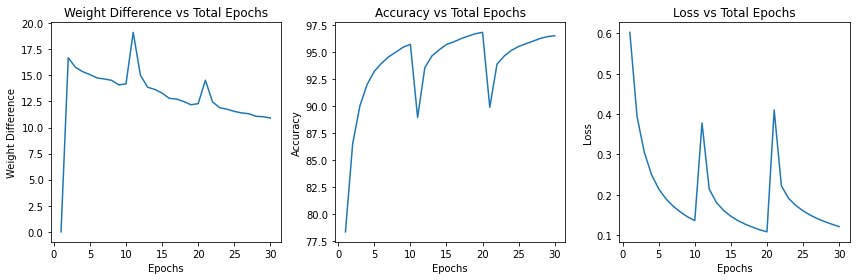

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, weight_diffs)
plt.xlabel('Epochs')
plt.ylabel('Weight Difference')
plt.title('Weight Difference vs Total Epochs')

plt.subplot(1, 3, 2)
plt.plot(epochs, accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Total Epochs')

plt.subplot(1, 3, 3)
plt.plot(epochs, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Total Epochs')

plt.tight_layout()
plt.show()